In [88]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [150]:
movies_path = "../data/dat/movies.dat"
users_path = "../data/dat/users.dat"

movies_path_write = "../data/csv/movies.tsv"
users_path_write = "../data/csv/users.tsv"

## Movies

In [156]:
movies_df = pd.read_csv(movies_path, delimiter='::', encoding='ISO-8859-1', names=['movie_id', 'title_year', 'genre'])
movies_df.head(-10)

/var/folders/b5/d68y3kns4w1c2sblc9gs2j2h0000gp/T/ipykernel_73558/219991137.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv(movies_path, delimiter='::', encoding='ISO-8859-1', names=['movie_id', 'title_year', 'genre'])


,movie_id,title_year,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3868,3938,"Slumber Party Massacre, The (1982)",Horror
3869,3939,"Slumber Party Massacre II, The (1987)",Horror
3870,3940,"Slumber Party Massacre III, The (1990)",Horror
3871,3941,Sorority House Massacre (1986),Horror


In [157]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_id    3883 non-null   int64 
 1   title_year  3883 non-null   object
 2   genre       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [158]:
# Extract title and year

movies_df['title'] = movies_df['title_year'].apply(lambda x: x[:-6])
movies_df['year'] = movies_df['title_year'].apply(lambda x: x[-6:][1:-1])

movies_df.drop(columns=['title_year'], inplace=True)

movies_df

,movie_id,genre,title,year
0,1,Animation|Children's|Comedy,Toy Story,1995
1,2,Adventure|Children's|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000
3879,3949,Drama,Requiem for a Dream,2000
3880,3950,Drama,Tigerland,2000
3881,3951,Drama,Two Family House,2000


In [159]:
# Extract genres and create separate columns for each genre
movies_df['genres'] = movies_df['genre'].apply(lambda x: x.split('|'))

# Create a column for each unique genre and fill with 1 if that genre is present, 0 otherwise
all_genres = set(genre for genres_list in movies_df['genres'] for genre in genres_list)
for genre in all_genres:
    movies_df[genre] = movies_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original movie_info and genres columns
movies_df.drop(columns=['genre', 'genres'], inplace=True)

# Display the resulting DataFrame
movies_df

,movie_id,title,year,Fantasy,Drama,Action,Horror,Musical,Crime,Children's,...,Documentary,Thriller,Western,Sci-Fi,Romance,Mystery,Film-Noir,Adventure,Comedy,Animation
0,1,Toy Story,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,2,Jumanji,1995,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,Waiting to Exhale,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3879,3949,Requiem for a Dream,2000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland,2000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House,2000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
movies_df.columns = movies_df.columns.str.lower()
movies_df.columns

Index(['movie_id', 'title', 'year', 'fantasy', 'drama', 'action', 'horror',
       'musical', 'crime', 'children's', 'war', 'documentary', 'thriller',
       'western', 'sci-fi', 'romance', 'mystery', 'film-noir', 'adventure',
       'comedy', 'animation'],
      dtype='object')

In [164]:
# save movies as csv
movies_df.to_csv(movies_path_write, sep='\t', index=False)

In [166]:
movies_df_test = pd.read_csv(movies_path_write, sep='\t')
movies_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     3883 non-null   int64 
 1   title        3883 non-null   object
 2   year         3883 non-null   int64 
 3   fantasy      3883 non-null   int64 
 4   drama        3883 non-null   int64 
 5   action       3883 non-null   int64 
 6   horror       3883 non-null   int64 
 7   musical      3883 non-null   int64 
 8   crime        3883 non-null   int64 
 9   children's   3883 non-null   int64 
 10  war          3883 non-null   int64 
 11  documentary  3883 non-null   int64 
 12  thriller     3883 non-null   int64 
 13  western      3883 non-null   int64 
 14  sci-fi       3883 non-null   int64 
 15  romance      3883 non-null   int64 
 16  mystery      3883 non-null   int64 
 17  film-noir    3883 non-null   int64 
 18  adventure    3883 non-null   int64 
 19  comedy       3883 non-null 

In [167]:
movies_df_test

,movie_id,title,year,fantasy,drama,action,horror,musical,crime,children's,...,documentary,thriller,western,sci-fi,romance,mystery,film-noir,adventure,comedy,animation
0,1,Toy Story,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,2,Jumanji,1995,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,Waiting to Exhale,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3879,3949,Requiem for a Dream,2000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland,2000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House,2000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Users

In [168]:
users_df = pd.read_csv(users_path, delimiter='::', encoding='ISO-8859-1', names=['user_id', 'gender', 'age_group', 'region', 'address'])
users_df

/var/folders/b5/d68y3kns4w1c2sblc9gs2j2h0000gp/T/ipykernel_73558/2471792224.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv(users_path, delimiter='::', encoding='ISO-8859-1', names=['user_id', 'gender', 'age_group', 'region', 'address'])


,user_id,gender,age_group,region,address
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [169]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    6040 non-null   int64 
 1   gender     6040 non-null   object
 2   age_group  6040 non-null   int64 
 3   region     6040 non-null   int64 
 4   address    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [170]:
users_df.describe()

,user_id,age_group,region
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [171]:
users_df.nunique()

user_id      6040
gender          2
age_group       7
region         21
address      3439
dtype: int64

In [172]:
print("List of unique age_group", users_df['age_group'].unique())
print("List of unique region", users_df['region'].unique())

List of unique age_group [ 1 56 25 45 50 35 18]
List of unique region [10 16 15  7 20  9  1 12 17  0  3 14  4 11  8 19  2 18  5 13  6]


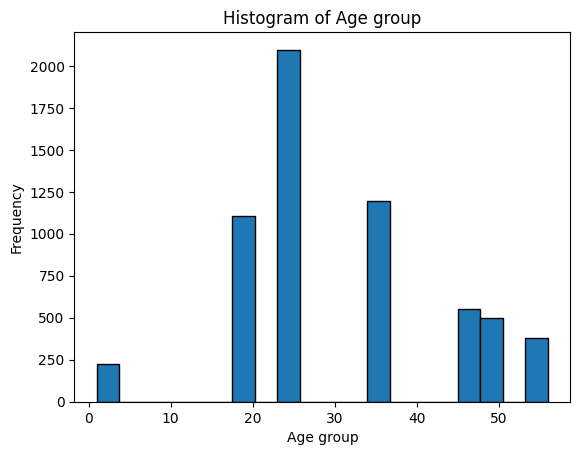

In [173]:

users_df['age_group'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.title('Histogram of Age group')
plt.show()

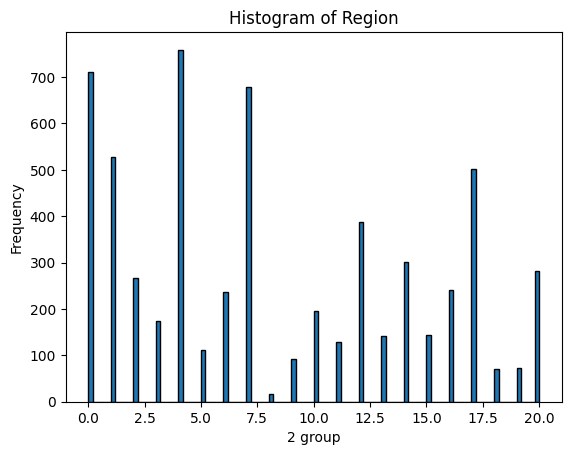

In [174]:
users_df['region'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('2 group')
plt.ylabel('Frequency')
plt.title('Histogram of Region')
plt.show()

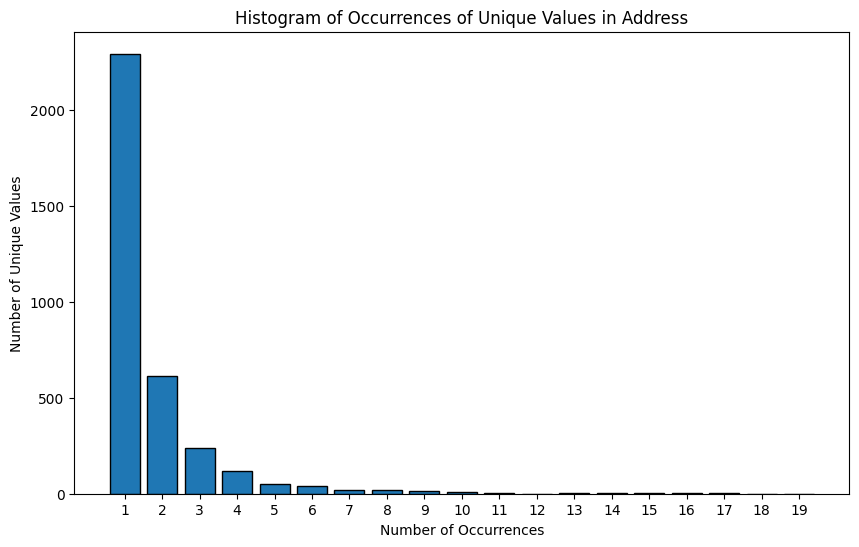

In [175]:
# Count the number of occurrences for each unique value in the feature
occurrences = users_df['address'].value_counts()

# Count how many unique values have each occurrence count
occurrence_counts = occurrences.value_counts().sort_index()

# occurrence_counts.values

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(occurrence_counts.index, occurrence_counts.values, edgecolor='black')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Unique Values')
plt.title('Histogram of Occurrences of Unique Values in Address')
plt.xticks(occurrence_counts.index)
plt.show()

In [176]:
# Group the DataFrame by feature "2" and create subtables
grouped_by_feature_2 = users_df.groupby('region')

# Create a dictionary to store the sets of feature "3" for each unique value of feature "2"
feature_3_sets = {key: set(group['address']) for key, group in grouped_by_feature_2}

# Find the intersection of all feature "3" sets
common_feature_3 = set.intersection(*feature_3_sets.values())

# Display the results
print(f"Common Address entries across all subtables based on Region:")
print(common_feature_3)

# If the intersection set is too large or empty, print a summary
if len(common_feature_3) == 0:
    print("No common entries found.")
else:
    print(f"Number of common Address entries: {len(common_feature_3)}")

Common Address entries across all subtables based on Region:
set()
No common entries found.


In [178]:
# save users as csv
users_df.to_csv(users_path_write, sep='\t', index=False)

In [179]:
users_df_test = pd.read_csv(users_path_write, sep='\t')
users_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    6040 non-null   int64 
 1   gender     6040 non-null   object
 2   age_group  6040 non-null   int64 
 3   region     6040 non-null   int64 
 4   address    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


Matrix size (||users|| x ||movies||)

In [183]:
print("number of users", users_df.shape[0])
print("number of movies", movies_df.shape[0])
users_df.shape[0] * movies_df.shape[0]

number of users 6040
number of movies 3883


23453320